In [3]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


In [1]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [2]:
!conda install -c conda-forge lightgbm==3.3.2

Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - lightgbm==3.3.2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    joblib-1.3.2               |     pyhd8ed1ab_0         216 KB  conda-forge
    libblas-3.9.0              |22_linux64_openblas          14 KB  conda-forge
    libcblas-3.9.0             |22_linux64_openblas          14 KB  conda-forge
    libgfortran-ng-13.2.0      |       h69a702a_5          23 KB  conda-forge
    l

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## LIghtGBM

In [ ]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=.2, random_state=156)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=.1, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=.05)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

/usr/local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, f1 스코어: {f1:.4f}, AUC: {roc_auc:.4f}')


get_clf_eval(y_test, preds, pred_proba)

NameError: name 'preds' is not defined

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

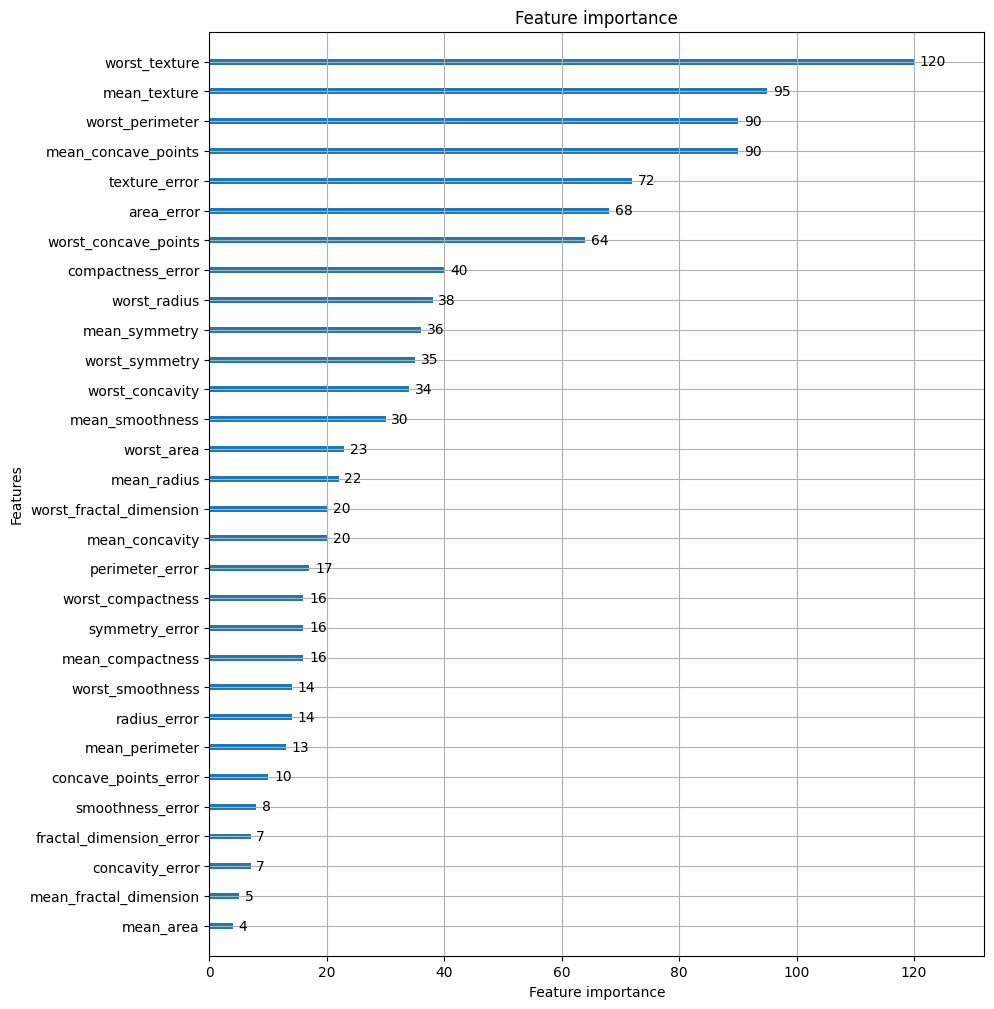

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

## 베이지안 최적화 - HyperOpt

In [ ]:
!pip install hyperopt

In [ ]:
from hyperopt import hp

# 입력 변수의 검색 공간 설정
search_space = {'x': hp.quniform('x', -10, 10, 1), 'y': hp.quniform('y', -15, 15, 1)}

In [ ]:
from hyperopt import STATUS_OK

# 목적함수 생성
def objective_func(search_space):
  x = search_space['x']
  y = search_space['y']
  retval = x ** 2 - 20 * y

  return retval

In [ ]:
from hyperopt import fmin, tpe, Trials
# 입력 결과 저장 객체 생성
trial_val = Trials()

best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5,
               trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_01)

100%|██████████| 5/5 [00:00<00:00, 270.36trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [ ]:
# 횟수를 20회로 늘림
trial_val = Trials()

best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20,
               trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_01)

100%|██████████| 20/20 [00:00<00:00, 731.87trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [ ]:
print(trial_val.results) # what's 'status'?

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [ ]:
# 수행 시마다 입력한 변수 출력
trial_val.vals

{'x': [-6.0,
  -4.0,
  4.0,
  -4.0,
  9.0,
  2.0,
  10.0,
  -9.0,
  -8.0,
  -0.0,
  -0.0,
  1.0,
  9.0,
  6.0,
  9.0,
  2.0,
  -2.0,
  -4.0,
  7.0,
  -0.0],
 'y': [5.0,
  10.0,
  -2.0,
  12.0,
  1.0,
  15.0,
  7.0,
  -10.0,
  0.0,
  -5.0,
  -3.0,
  2.0,
  4.0,
  10.0,
  3.0,
  3.0,
  -14.0,
  -8.0,
  11.0,
  -0.0]}

In [ ]:
# results, vals 한눈에 보기

losses = [loss_dict['loss'] for loss_dict in trial_val.results]

result_df = pd.DataFrame({'x': trial_val.vals['x'], 'y': trial_val.vals['y'], 'losses': losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


## HyperOpt 이용 XGBoost 최적화

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=.2, random_state=156)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=.1, random_state=156)

In [ ]:
from hyperopt import hp

xgb_search_space = {
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'colsample_bytree': hp.uniform('colsamplt_bytree', 0.5, 1)
}

In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

def objective_func(search_space):
  # n_estimator: 수행 시간 줄이기 위해 100으로 설정
  xgb_clf = XGBClassifier(
      n_estimator=100,
      max_depth=int(search_space['max_depth']),
      min_child_weight=int(search_space['min_child_weight']),
      learning_rate=search_space['learning_rate'],
      colsample_bytree=search_space['colsample_bytree'],
      eval_metric='logloss'
  )
  accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
  return {'loss': -1 * np.mean(accuracy), 'status': STATUS_OK}

In [ ]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trial_val,
            rstate=np.random.default_rng(seed=0))
print('best:', best)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



  2%|▏         | 1/50 [00:03<03:15,  3.99s/trial, best loss: -0.9516962937144186]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



  4%|▍         | 2/50 [00:04<01:45,  2.20s/trial, best loss: -0.9516962937144186]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



  6%|▌         | 3/50 [00:05<01:14,  1.58s/trial, best loss: -0.951710816777042] 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



  8%|▊         | 4/50 [00:06<00:53,  1.16s/trial, best loss: -0.967047170907401]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 10%|█         | 5/50 [00:07<00:46,  1.04s/trial, best loss: -0.967047170907401]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 12%|█▏        | 6/50 [00:07<00:39,  1.11trial/s, best loss: -0.967047170907401]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:27:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 14%|█▍        | 7/50 [00:08<00:42,  1.00trial/s, best loss: -0.967047170907401]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 16%|█▌        | 8/50 [00:09<00:37,  1.12trial/s, best loss: -0.967047170907401]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 18%|█▊        | 9/50 [00:10<00:32,  1.24trial/s, best loss: -0.967047170907401]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 20%|██        | 10/50 [00:11<00:32,  1.22trial/s, best loss: -0.967047170907401]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 22%|██▏       | 11/50 [00:12<00:35,  1.09trial/s, best loss: -0.967047170907401]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 24%|██▍       | 12/50 [00:12<00:32,  1.18trial/s, best loss: -0.967047170907401]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 26%|██▌       | 13/50 [00:13<00:27,  1.34trial/s, best loss: -0.967047170907401]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 28%|██▊       | 14/50 [00:16<00:56,  1.57s/trial, best loss: -0.967047170907401]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 30%|███       | 15/50 [00:18<00:56,  1.62s/trial, best loss: -0.967047170907401]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 32%|███▏      | 16/50 [00:19<00:47,  1.38s/trial, best loss: -0.967047170907401]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 34%|███▍      | 17/50 [00:21<00:50,  1.54s/trial, best loss: -0.967047170907401]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 36%|███▌      | 18/50 [00:22<00:47,  1.48s/trial, best loss: -0.967047170907401]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 38%|███▊      | 19/50 [00:23<00:38,  1.23s/trial, best loss: -0.967047170907401]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 40%|████      | 20/50 [00:24<00:31,  1.06s/trial, best loss: -0.967047170907401]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 42%|████▏     | 21/50 [00:24<00:26,  1.08trial/s, best loss: -0.967047170907401]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 44%|████▍     | 22/50 [00:25<00:25,  1.08trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 46%|████▌     | 23/50 [00:26<00:22,  1.20trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 48%|████▊     | 24/50 [00:26<00:20,  1.26trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 50%|█████     | 25/50 [00:27<00:17,  1.40trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 52%|█████▏    | 26/50 [00:28<00:18,  1.29trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 54%|█████▍    | 27/50 [00:30<00:28,  1.25s/trial, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 56%|█████▌    | 28/50 [00:32<00:28,  1.28s/trial, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 58%|█████▊    | 29/50 [00:32<00:22,  1.05s/trial, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 60%|██████    | 30/50 [00:33<00:18,  1.09trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 62%|██████▏   | 31/50 [00:33<00:16,  1.17trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 64%|██████▍   | 32/50 [00:34<00:14,  1.27trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 66%|██████▌   | 33/50 [00:34<00:10,  1.57trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 68%|██████▊   | 34/50 [00:35<00:08,  1.89trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 70%|███████   | 35/50 [00:35<00:06,  2.21trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 72%|███████▏  | 36/50 [00:35<00:05,  2.55trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 74%|███████▍  | 37/50 [00:35<00:04,  2.73trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 76%|███████▌  | 38/50 [00:36<00:04,  2.93trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 78%|███████▊  | 39/50 [00:36<00:03,  2.96trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 80%|████████  | 40/50 [00:36<00:03,  2.97trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 82%|████████▏ | 41/50 [00:37<00:02,  3.17trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 84%|████████▍ | 42/50 [00:37<00:02,  3.36trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 86%|████████▌ | 43/50 [00:37<00:02,  2.93trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 88%|████████▊ | 44/50 [00:38<00:01,  3.13trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 90%|█████████ | 45/50 [00:38<00:01,  3.38trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 92%|█████████▏| 46/50 [00:38<00:01,  3.57trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 94%|█████████▍| 47/50 [00:38<00:00,  3.48trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

 

 96%|█████████▌| 48/50 [00:39<00:00,  3.38trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



 98%|█████████▊| 49/50 [00:39<00:00,  3.04trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



100%|██████████| 50/50 [00:39<00:00,  3.04trial/s, best loss: -0.9670762170326479]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:28:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)



100%|██████████| 50/50 [00:39<00:00,  1.25trial/s, best loss: -0.9670762170326479]
best: {'colsamplt_bytree': 0.5258417475140724, 'learning_rate': 0.14455115430536947, 'max_depth': 8.0, 'min_child_weight': 2.0}


In [ ]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate=best['learning_rate'],
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsamplt_bytree'], 5)
                            )

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
                eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.55258	validation_1-logloss:0.57577
[1]	validation_0-logloss:0.46599	validation_1-logloss:0.51537
[2]	validation_0-logloss:0.39833	validation_1-logloss:0.46660
[3]	validation_0-logloss:0.34463	validation_1-logloss:0.42383
[4]	validation_0-logloss:0.30211	validation_1-logloss:0.39563
[5]	validation_0-logloss:0.26464	validation_1-logloss:0.37131


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:0.23405	validation_1-logloss:0.35328
[7]	validation_0-logloss:0.20861	validation_1-logloss:0.33405
[8]	validation_0-logloss:0.18688	validation_1-logloss:0.32337
[9]	validation_0-logloss:0.16857	validation_1-logloss:0.31484
[10]	validation_0-logloss:0.15249	validation_1-logloss:0.30754
[11]	validation_0-logloss:0.13861	validation_1-logloss:0.29822
[12]	validation_0-logloss:0.12676	validation_1-logloss:0.29121
[13]	validation_0-logloss:0.11654	validation_1-logloss:0.28386
[14]	validation_0-logloss:0.10732	validation_1-logloss:0.27858
[15]	validation_0-logloss:0.09855	validation_1-logloss:0.27333
[16]	validation_0-logloss:0.09162	validation_1-logloss:0.27032
[17]	validation_0-logloss:0.08600	validation_1-logloss:0.27021
[18]	validation_0-logloss:0.07903	validation_1-logloss:0.26432
[19]	validation_0-logloss:0.07384	validation_1-logloss:0.26143
[20]	validation_0-logloss:0.06856	validation_1-logloss:0.25902
[21]	validation_0-logloss:0.06387	validation_1-logloss:0.25

## 산탄데르 고객 만족 예측

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv('/content/drive/MyDrive/train.csv', encoding='latin-1')
print('shape:', cust_df.shape)
cust_df.head()

shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print(f'unsatisfied proportion: {unsatisfied_cnt/total_cnt}')

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied proportion: 0.0395685345961589


In [ ]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [ ]:
cust_df.var3.value_counts()

var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: count, Length: 208, dtype: int64

In [ ]:
cust_df.drop('ID', axis=1, inplace=True)
cust_df.replace(-999999, 2, inplace=True)

X_features = cust_df.iloc[:, :-1]
y_label = cust_df.iloc[:, -1]
print('feature data shape:', X_features.shape)

feature data shape: (76020, 369)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=.2, random_state=0)

# 데이터 불균형이 있으므로 같은 비율로 나누었는지 확인
train_cnt = y_train.count()
test_cnt = y_test.count()
print(f'train set shape: {X_train.shape}, test set shape: {X_test.shape}')

print('train set label value distribution proportion')
print(y_train.value_counts()/train_cnt)
print('test set label value distribution proportion')
print(y_test.value_counts()/test_cnt)

train set shape: (60816, 369), test set shape: (15204, 369)
train set label value distribution proportion
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64
test set label value distribution proportion
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=.3, random_state=0)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimator=500, learning_rate=.05, random_state=156)

xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set= [(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print(f'ROC_AUC: {xgb_roc_score:.4f}')

[0]	validation_0-auc:0.83603	validation_1-auc:0.80978
[1]	validation_0-auc:0.83783	validation_1-auc:0.81126
[2]	validation_0-auc:0.83892	validation_1-auc:0.81192
[3]	validation_0-auc:0.84090	validation_1-auc:0.81349
[4]	validation_0-auc:0.84187	validation_1-auc:0.81356
[5]	validation_0-auc:0.84355	validation_1-auc:0.81422
[6]	validation_0-auc:0.84534	validation_1-auc:0.81550
[7]	validation_0-auc:0.84658	validation_1-auc:0.81623
[8]	validation_0-auc:0.84727	validation_1-auc:0.81669
[9]	validation_0-auc:0.84794	validation_1-auc:0.81668
[10]	validation_0-auc:0.84980	validation_1-auc:0.81828
[11]	validation_0-auc:0.85105	validation_1-auc:0.81965
[12]	validation_0-auc:0.85217	validation_1-auc:0.81999
[13]	validation_0-auc:0.85301	validation_1-auc:0.82049
[14]	validation_0-auc:0.85558	validation_1-auc:0.82210
[15]	validation_0-auc:0.85662	validation_1-auc:0.82288
[16]	validation_0-auc:0.85811	validation_1-auc:0.82380
[17]	validation_0-auc:0.85864	validation_1-auc:0.82365
[18]	validation_0-au

In [ ]:
from hyperopt import hp

xgb_search_space = {
    'max_depth': hp.quniform('max_depth', 5, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', .5, .95),
    'learning_rate': hp.uniform('learning_rate', .01, .2)
}

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

def objective_func(search_space):
  xgb_clf = XGBClassifier(n_estimator=100,
                          max_depth=int(search_space['max_depth']),
                          min_child_weight=int(search_space['min_child_weight']),
                          colsample_bytree=search_space['colsample_bytree'],
                          learning_rate=search_space['learning_rate']
                          )

  roc_auc_list = []

  kf = KFold(n_splits=3)
  for tr_index, val_index in kf.split(X_train):
    X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
    X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

    xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc',
                eval_set=[(X_tr, y_tr), (X_val, y_val)])

    score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
    roc_auc_list.append(score)

  return -1 * np.mean(roc_auc_list)

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(
    fn=objective_func,
    space=xgb_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(seed=30)
)

print('best:', best)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[2]	validation_0-auc:0.89228	validation_1-auc:0.81992
[3]	validation_0-auc:0.89537	validation_1-auc:0.82066
[4]	validation_0-auc:0.89597	validation_1-auc:0.82124
[5]	validation_0-auc:0.89808	validation_1-auc:0.82412
[6]	validation_0-auc:0.90106	validation_1-auc:0.82432
[7]	validation_0-auc:0.90986	validation_1-auc:0.82240
[8]	validation_0-auc:0.91253	validation_1-auc:0.82338
[9]	validation_0-auc:0.91329	validation_1-auc:0.82368
[10]	validation_0-auc:0.91649	validation_1-auc:0.82525
[11]	validation_0-auc:0.91917	validation_1-auc:0.82466
[12]	validation_0-auc:0.92271	validation_1-auc:0.82509
[13]	validation_0-auc:0.92454	validation_1-auc:0.82561
[14]	validation_0-auc:0.92754	validation_1-auc:0.82498
[15]	validation_0-auc:0.93039	validation_1-auc:0.82498
[16]	validation_0-auc:0.93208	validation_1-auc:0.82383
[17]	validation_0-auc:0.93381	validation_1-auc:0.82427
[18]	validation_0-auc:0.93527	validation_1-auc:0.82434
[19]	validation_0-auc:0.93715	validat

Exception ignored on calling ctypes callback function
: 
<bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x7b08eb7a3af0>>
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 641, in _next_wrapper

return self._handle_exception(lambda: self.next(input_data), 0)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 557, in _handle_exception

return fn()
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 641, in <lambda>

return self._handle_exception(lambda: self.next(input_data), 0)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/data.py", line 1280, in next

input_data(**self.kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f

return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 624, in input_data

new, cat_codes, feature_names, feature_types = _proxy_transform(
  F

 80%|████████  | 40/50 [53:43<13:25, 80.60s/trial, best loss: -0.8382516761288219]


XGBoostError: [07:22:56] /workspace/src/data/proxy_dmatrix.h:158: Unknown type: v
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3effba) [0x7b08cb811fba]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3f1312) [0x7b08cb813312]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3f52ce) [0x7b08cb8172ce]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3f8858) [0x7b08cb81a858]
  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3a2a07) [0x7b08cb7c4a07]
  [bt] (5) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGQuantileDMatrixCreateFromCallback+0x2b0) [0x7b08cb587c40]
  [bt] (6) /usr/local/lib/libffi.so.8(+0x6a4a) [0x7b0951c72a4a]
  [bt] (7) /usr/local/lib/libffi.so.8(+0x5fea) [0x7b0951c71fea]
  [bt] (8) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x7b09519033e9]



In [ ]:
xgb_clf = XGBClassifier(n_estimators=500, learning_rate= round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']),
                        min_child_weight=int(best['min_child_weight']),
                        colsample_bytree=round(best['colsample_bytree'], 5)
                        )

xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
        eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print(f'ROC_AUC:{xgb_roc_score:.4f}')

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplot(figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=.4)

### LightGBM 하이퍼 파라미터 튜닝

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifer(n_estimators=500)

eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print(f'ROC_AUC:{lgbm_roc_score:.4f}')

In [ ]:
lgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 100, 160, 1),
    'min_child_weight': hp.quniform('min_child_weight', 60, 100, 1),
    'subsample': hp.uniform('subsample', .7, 1),
    'learning_rate': hp.uniform('learning_rate', .01, .2)
}


def objective_func(search_space):
  lgbm_clf = LGBMClassifier(
      n_estimator=100,
      num_leaves=int(search_space['num_leaves'])
      max_depth=int(search_space['max_depth']),
      min_child_weight=int(search_space['min_child_weight']),
      subsample=search_space['subsample'],
      learning_rate=search_space['learning_rate']
      )

  roc_auc_list = []

  kf = KFold(n_splits=3)
  for tr_index, val_index in kf.split(X_train):
    X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
    X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

    lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc',
                eval_set=[(X_tr, y_tr), (X_val, y_val)])

    score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
    roc_auc_list.append(score)

  return -1 * np.mean(roc_auc_list)

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(
    fn=objective_func,
    space=xgb_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(seed=30)
)

print('best:', best)

In [ ]:
lgbm_clf =LGBMClassifier(n_estimators=500, learning_rate= round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']),
                        min_child_weight=int(best['min_child_weight']),
                        subsample=round(best['subsample'], 5)
                        )

lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
        eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print(f'ROC_AUC:{lgbm_roc_score:.4f}')

## 캐글 신용카드 사기 검출

### 언더 샘플링 vs 오버 샘플링

In [23]:
!conda install -c conda-forge imbalanced-learn

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.12.2    |     pyhd8ed1ab_0         155 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         155 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.12.2-pyhd8ed1ab_0 



                                                                        
Preparing transaction: / done
Verifying transaction: \ do

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('/content/drive/MyDrive/creditcardfraud/creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time', axis=1, inplace=True)
  return df_copy

In [11]:
def get_train_test_dataset(df=None):
  df_copy = get_preprocessed_df(df)
  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:, -1]

  X_train, X_test, y_train, y_test = \
  train_test_split(X_features, y_target, test_size=.3, random_state=0, stratify=y_target)

  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [12]:
print('train set proportion')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('test set proportion')
print(y_test.value_counts()/y_test.shape[0] * 100)

train set proportion
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
test set proportion
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [15]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85280    15]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8598, 재현율: 0.6216, f1 스코어: 0.7216, AUC: 0.9738


In [16]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:, 1]
  get_clf_eval(tgt_test, pred, pred_proba)

In [17]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

KeyboardInterrupt: 

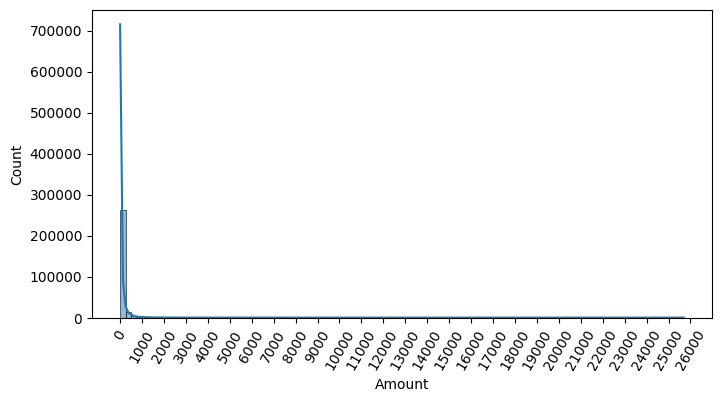

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

In [18]:
# 분포를 정규분포 형태로 변환
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  return df_copy

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### Logistic Regression score ###')
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM score ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### Logistic Regression score ###
오차 행렬
[[85281    14]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8692, 재현율: 0.6284, f1 스코어: 0.7294, AUC: 0.9706
### LightGBM score ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500, f1 스코어: 0.8409, AUC: 0.9779


In [19]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  return df_copy

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### Logistic Regression score ###')
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM score ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### Logistic Regression score ###
오차 행렬
[[85282    13]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014, f1 스코어: 0.7120, AUC: 0.9734
### LightGBM score ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635, f1 스코어: 0.8496, AUC: 0.9796


## 이상치 데이터 제거

<Axes: >

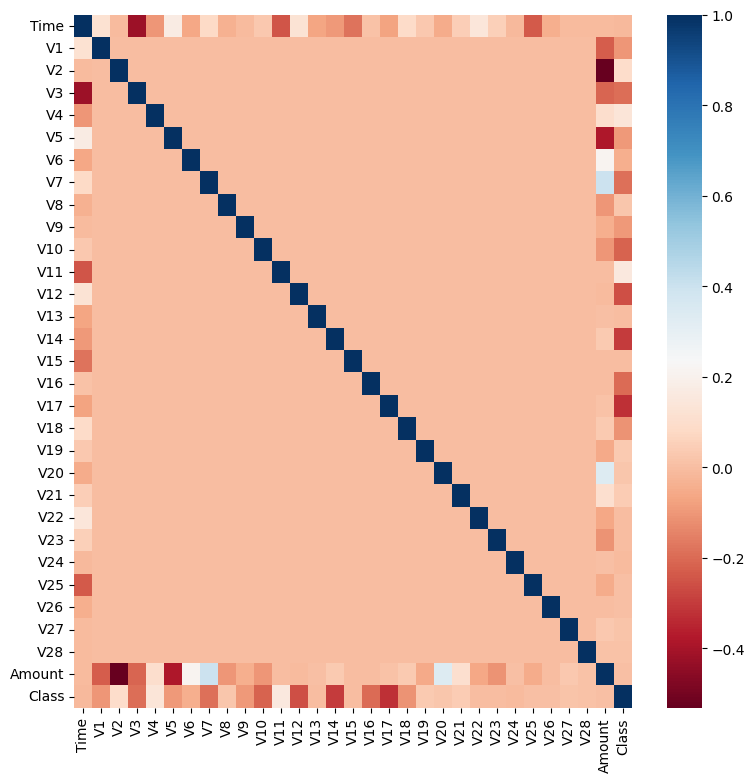

In [9]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [20]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  fraud = df[df['Class'] == 1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)

  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight

  outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
  return outlier_index

In [21]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('outlier index:', outlier_index)

outlier index: Index([8296, 8615, 9035, 9252], dtype='int64')


In [22]:
# 이상치 추출 및 삭제 로직 추가
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  df_copy.drop(outlier_index, axis=0, inplace=True)
  return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### Logistic Regression score ###')
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM score ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### Logistic Regression score ###
오차 행렬
[[85280    15]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8673, 재현율: 0.6712, f1 스코어: 0.7568, AUC: 0.9725
### LightGBM score ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288, f1 스코어: 0.8897, AUC: 0.9780


## SMOTE 오버 샘플링 적용

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('Before:', X_train.shape, y_train.shape)
print('After:', X_train_over.shape, y_train_over.shape)
print('resampled label distribution:\n', pd.Series(y_train_over).value_counts())

Before: (199362, 29) (199362,)
After: (398040, 29) (398040,)
resampled label distribution:
 Class
0    199020
1    199020
Name: count, dtype: int64


In [25]:
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82933  2362]
 [   11   135]]
정확도: 0.9722, 정밀도: 0.0541, 재현율: 0.9247, f1 스코어: 0.1022, AUC: 0.9736


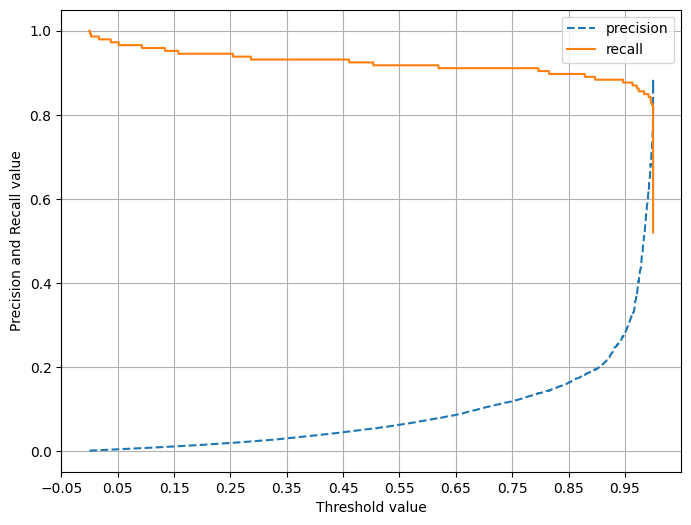

In [27]:
from sklearn.metrics import precision_recall_curve


def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  plt.figure(figsize=(8, 6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  # X축 스케일링
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, .1), 2))

  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()


precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1]) # 로지스틱 회귀는 적절하지 않은듯!

In [28]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493, f1 스코어: 0.8794, AUC: 0.9814


## 스태킹 앙상블

In [56]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=.2, random_state=0)

In [57]:
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

lr_final = LogisticRegression()

In [58]:
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [59]:
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

In [60]:
print(f'''KNN: {accuracy_score(y_test, knn_pred):.4f}
Random Forest: {accuracy_score(y_test, rf_pred):.4f}
Decision Tree: {accuracy_score(y_test, dt_pred):.4f}
AdaBoost: {accuracy_score(y_test, ada_pred):.4f}''')

KNN: 0.9211
Random Forest: 0.9649
Decision Tree: 0.9123
AdaBoost: 0.9561


In [61]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [62]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print(f'final meta model score: {accuracy_score(y_test, final):.4f}')

final meta model score: 0.9649


### CV 세트 기반 스태킹

In [64]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_based_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  kf = KFold(n_splits=n_folds, shuffle=False)

  # 메타 모델의 학습 데이터 반환용 ndarray 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0], 1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))
  print(model.__class__.__name__, 'model start')

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    print('\t fold set:', folder_counter, 'start')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    model.fit(X_tr, y_tr)
    train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
    test_pred[:, folder_counter] = model.predict(X_test_n)

  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)

  return train_fold_pred, test_pred_mean

In [66]:
knn_train, knn_test = get_stacking_based_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_based_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_based_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_based_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier model start
	 fold set: 0 start
	 fold set: 1 start
	 fold set: 2 start
	 fold set: 3 start
	 fold set: 4 start
	 fold set: 5 start
	 fold set: 6 start
RandomForestClassifier model start
	 fold set: 0 start
	 fold set: 1 start
	 fold set: 2 start
	 fold set: 3 start
	 fold set: 4 start
	 fold set: 5 start
	 fold set: 6 start
DecisionTreeClassifier model start
	 fold set: 0 start
	 fold set: 1 start
	 fold set: 2 start
	 fold set: 3 start
	 fold set: 4 start
	 fold set: 5 start
	 fold set: 6 start
AdaBoostClassifier model start
	 fold set: 0 start
	 fold set: 1 start
	 fold set: 2 start
	 fold set: 3 start
	 fold set: 4 start
	 fold set: 5 start
	 fold set: 6 start


In [70]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('Original train feature data Shape:', X_train.shape, 'Original test feature data Shape:', X_test.shape)
print('Stacking train feature data Shape:', Stack_final_X_train.shape, 'Stacking test feature data Shape:', Stack_final_X_test.shape)

Original train feature data Shape: (455, 30) Original test feature data Shape: (114, 30)
Stacking train feature data Shape: (455, 4) Stacking test feature data Shape: (114, 4)


In [72]:
lr_final = LogisticRegression()
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print(f'final meta model score: {accuracy_score(y_test, stack_final):.4f}')

final meta model score: 0.9737
